In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_utils import *
import cifar10_DNN

Using TensorFlow backend.


cifar10_DNN모듈을 사용한다

원래 이미지 데이터

In [2]:
(X_train_origin, Y_train_origin), (X_test_origin, Y_test_origin) = cifar10_DNN.datasets.cifar10.load_data()

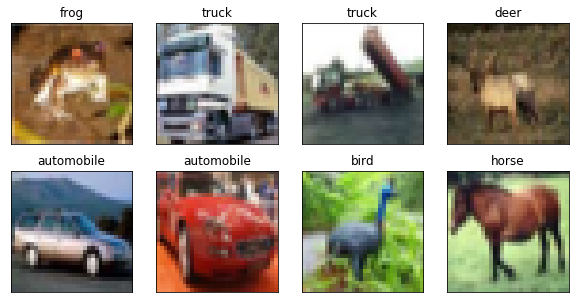

In [3]:
show_images(X_train_origin, Y_train_origin, 8)

pre-processing된 데이터 load

In [4]:
(X_train, Y_train), (X_test, Y_test) = cifar10_data_load(cifar10_DNN.datasets.cifar10)

Data type changed to float32, label type changed to categorical
Normalize Data


In [5]:
cifar_model = cifar10_DNN.CifarDNN(img_shape = X_train.shape[1], class_num = Y_train.shape[1])

모델 펼처보기

In [6]:
cifar_model.show_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer1 (Dense)         (None, 32)                98336     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 64)                2112      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
__________

In [7]:
history_train = cifar_model.train(X_train, Y_train, 2, 32, 0.2)

#  model evaluate
result = cifar_model.show_eval(X_test, Y_test, 32)
print('Test Loss : ', result[0])
print('Test Accuracy : ', result[1]*100, '%')

print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))
print('actual class : ', np.where(Y_test[:3])[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 5s 114us/step - loss: 1.9967 - acc: 0.2915 - val_loss: 1.7511 - val_acc: 0.3813

Epoch 00001: val_loss improved from inf to 1.75114, saving model to ./save_model/01-1.7511-0.2915.hd5
Epoch 2/2
40000/40000 [==============================] - 4s 97us/step - loss: 1.7875 - acc: 0.3598 - val_loss: 1.6914 - val_acc: 0.3965

Epoch 00002: val_loss improved from 1.75114 to 1.69135, saving model to ./save_model/02-1.6914-0.3598.hd5
10000/10000 [==============================] - 0s 33us/step
Test Loss :  1.6709509449005127
Test Accuracy :  0.4111
Test Loss :  1.6709509449005127
Test Accuracy :  41.11 %
predict class :  [6 8 8]
actual class :  [3 8 8]


In [8]:
print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))

predict class :  [6 8 8]


In [9]:
print('predict class : ',cifar_model.predict(X_test[:3]))

predict class :  [6 8 8]


In [10]:
prediction = cifar_model.predict(X_test)

In [11]:
print(Y_test_origin[:8])
print(prediction[:8])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]]
[6 8 8 8 4 6 5 6]


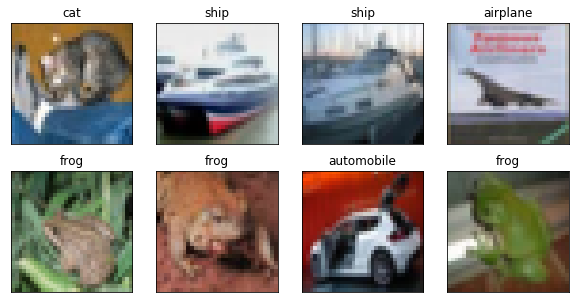

In [12]:
show_images(X_test_origin, Y_test_origin, 8)

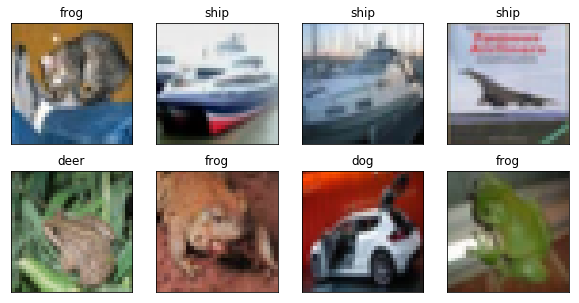

In [13]:
show_images(X_test_origin, prediction, 8)

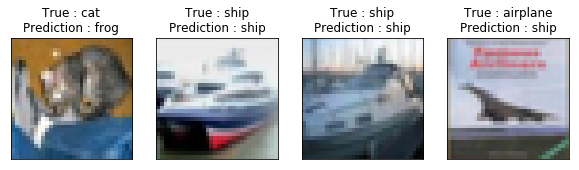

In [14]:
show_images_compare(X_test_origin, Y_test_origin, prediction)

In [15]:
result = cifar_model.show_eval(X_test, Y_test, 32)

10000/10000 [==============================] - 0s 35us/step
Test Loss :  1.6709509449005127
Test Accuracy :  0.4111


In [16]:
print('predict class : ',cifar_model.model.predict(X_test[:3]))

predict class :  [[6.1532266e-02 5.4423235e-02 1.1736126e-01 1.5188399e-01 8.9238524e-02
  1.5329061e-01 2.1101771e-01 5.9778508e-02 4.1736413e-02 5.9737533e-02]
 [9.3491033e-02 9.4690055e-02 1.5239527e-03 1.4767747e-03 6.9254229e-04
  3.2692935e-04 8.0258811e-05 2.6486672e-03 4.9185708e-01 3.1321266e-01]
 [1.8287970e-01 1.2971207e-01 8.0105141e-03 3.5376197e-03 4.9574864e-03
  2.1871724e-03 9.7130239e-04 7.1466272e-03 4.9364266e-01 1.6695479e-01]]


In [17]:
print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))

predict class :  [6 8 8]


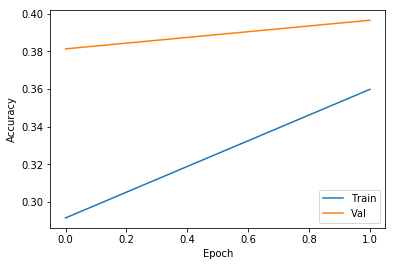

In [18]:
cifar10_DNN.plot_acc(history_train)

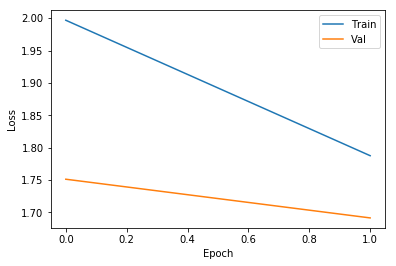

In [19]:
cifar10_DNN.plot_loss(history_train)

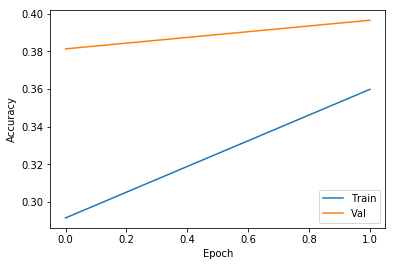

In [20]:
plot_acc(cifar_model.history)

In [21]:
prediction = cifar_model.model.predict(X_test)
Y_prediction = np.argmax(prediction, axis=1)

# label shape is digit
print(confusion_mat(Y_test_origin, Y_prediction))

[[422  36  65  24  28  20  24  57 276  48]
 [ 40 459  15  27  10  43  43  19 158 186]
 [ 97  31 194  76 182 104 188  75  36  17]
 [ 24  32  99 224  52 206 222  49  53  39]
 [ 43  11  85  43 375  54 249  82  42  16]
 [ 21  20  89 152  76 356 155  53  58  20]
 [  7  19  67  78  99  75 596  21  17  21]
 [ 27  32  48  53 136 102  91 395  58  58]
 [ 92  43  16  39  13  22  22  16 669  68]
 [ 34 159  15  41  20  17  46  43 204 421]]


In [22]:
print(confusion_report(Y_test_origin, Y_prediction))

              precision    recall  f1-score   support

           0       0.52      0.42      0.47      1000
           1       0.55      0.46      0.50      1000
           2       0.28      0.19      0.23      1000
           3       0.30      0.22      0.25      1000
           4       0.38      0.38      0.38      1000
           5       0.36      0.36      0.36      1000
           6       0.36      0.60      0.45      1000
           7       0.49      0.40      0.44      1000
           8       0.43      0.67      0.52      1000
           9       0.47      0.42      0.44      1000

   micro avg       0.41      0.41      0.41     10000
   macro avg       0.41      0.41      0.40     10000
weighted avg       0.41      0.41      0.40     10000



In [23]:
np.unique(Y_test_origin)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])